In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor

In [2]:
covid = pd.read_csv('us-counties-2020.csv')

In [3]:
covid[(covid['county'] == 'Unknown') & (covid['date'] == '2020-12-31')]

,date,county,state,fips,cases,deaths
881582,2020-12-31,Unknown,Alaska,NaN,218,0.0
881672,2020-12-31,Unknown,Arkansas,NaN,2819,0.0
881807,2020-12-31,Unknown,Connecticut,NaN,665,0.0
881812,2020-12-31,Unknown,Delaware,NaN,136,0.0
881877,2020-12-31,Unknown,Florida,NaN,3010,0.0
882026,2020-12-31,Unknown,Georgia,NaN,3623,6.0
882042,2020-12-31,Unknown,Guam,NaN,8286,123.0
882374,2020-12-31,Unknown,Iowa,NaN,694,0.0
882484,2020-12-31,Unknown,Kansas,NaN,0,408.0
882668,2020-12-31,Unknown,Louisiana,NaN,399,0.0


In [4]:
covid = covid[covid['county'] != 'Unknown']

In [5]:
covid['county_state'] = covid['county'] + ", " + covid['state']
covid

,date,county,state,fips,cases,deaths,county_state
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,"Cook, Illinois"
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
...,...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0,"Sweetwater, Wyoming"
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0,"Teton, Wyoming"
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0,"Uinta, Wyoming"
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0,"Washakie, Wyoming"


In [6]:
covid['county'].describe()

count         877254
unique          1929
top       Washington
freq            8777
Name: county, dtype: object

In [7]:
covid['state'].describe()

count     877254
unique        54
top        Texas
freq       67001
Name: state, dtype: object

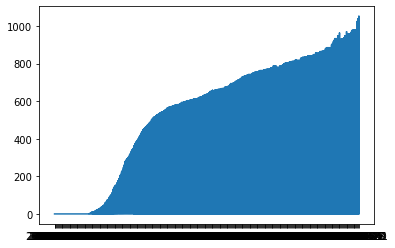

In [8]:
washington_data = covid[covid['state']=='Washington']
plt.plot(washington_data['date'],washington_data['deaths']);

In [9]:
def extract_time_range_data(start_date,end_date):
    diff_deaths = covid[covid['date'] == end_date].set_index('county_state')['deaths'] - covid[covid['date'] == start_date].set_index('county_state')['deaths']
    diff_cases = covid[covid['date'] == end_date].set_index('county_state')['cases'] - covid[covid['date'] == start_date].set_index('county_state')['cases']
    df = covid[covid['date'] == end_date].set_index('county_state')
    df['new_cases'] = diff_cases
    df['new_deaths'] = diff_deaths
    df.drop('cases',inplace=True,axis=1)
    df.drop('deaths',inplace=True,axis=1)
    df.drop('date',inplace=True,axis=1)
    return df

In [10]:
covid_tf = extract_time_range_data('2020-08-01','2020-12-31')
covid_tf = covid_tf.sort_values('new_cases')
covid_tf = covid_tf[~covid_tf['new_cases'].isna()]
covid_tf['mortality'] = covid_tf['new_deaths']/covid_tf['new_cases']
covid_tf.loc[covid_tf['new_cases']==0,'mortality'] = 0
covid_tf.loc[covid_tf['mortality']>=1,'mortality'] = 1
covid_tf


,county,state,fips,new_cases,new_deaths,mortality
county_state,,,,,,
"Tinian, Northern Mariana Islands",Tinian,Northern Mariana Islands,69120.0,1.0,0.0,0.000000
"Harding, New Mexico",Harding,New Mexico,35021.0,7.0,0.0,0.000000
"Hinsdale, Colorado",Hinsdale,Colorado,8053.0,10.0,0.0,0.000000
"Culebra, Puerto Rico",Culebra,Puerto Rico,72049.0,11.0,NaN,NaN
"Haines Borough, Alaska",Haines Borough,Alaska,2100.0,12.0,0.0,0.000000
...,...,...,...,...,...,...
"Miami-Dade, Florida",Miami-Dade,Florida,12086.0,177666.0,2541.0,0.014302
"New York City, New York",New York City,New York,NaN,200716.0,2137.0,0.010647
"Maricopa, Arizona",Maricopa,Arizona,4013.0,203154.0,3036.0,0.014944


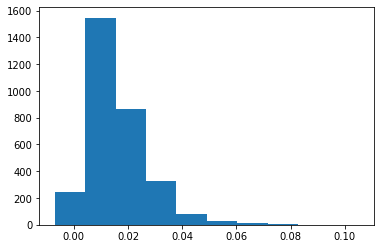

In [11]:
plt.hist(covid_tf['mortality']);

In [12]:
covid_tf.index

Index(['Tinian, Northern Mariana Islands', 'Harding, New Mexico',
       'Hinsdale, Colorado', 'Culebra, Puerto Rico', 'Haines Borough, Alaska',
       'Kenedy, Texas', 'Wrangell City and Borough, Alaska',
       'McPherson, Nebraska', 'Petersburg Borough, Alaska', 'Sherman, Oregon',
       ...
       'Orange, California', 'Dallas, Texas', 'Riverside, California',
       'San Bernardino, California', 'Harris, Texas', 'Miami-Dade, Florida',
       'New York City, New York', 'Maricopa, Arizona', 'Cook, Illinois',
       'Los Angeles, California'],
      dtype='object', name='county_state', length=3191)

## Simply Analytics Data ###

In [13]:
demo = pd.read_csv('New Project 2_Ranking_2022-10-27_17-24-28.csv')
demo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 280 columns):
 #    Column                                                                                                                                                                                                                                                                                                                                                    Dtype  
---   ------                                                                                                                                                                                                                                                                                                                                                    -----  
 0    Name                                                                                                                                                                  

In [14]:
# demo_clean['Name']
# covid_tf[covid_tf.index.str.contains('Acadia')]

In [15]:
demo['Name']

0       Abbeville County, SC
1          Acadia Parish, LA
2        Accomack County, VA
3             Ada County, ID
4           Adair County, IA
                ...         
3217         Yuma County, AZ
3218         Yuma County, CO
3219       Zapata County, TX
3220       Zavala County, TX
3221      Ziebach County, SD
Name: Name, Length: 3222, dtype: object

In [16]:
demo_clean = demo.drop(demo.columns[[1,2,3,4,5,6,7,9,21,23,25,30,31,32,33,34,46,47,48,58,65,66,80,93,94,123,125]],axis=1)
demo_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 253 columns):
 #    Column                                                                                                                                                                                                                                                                                                                                                    Dtype  
---   ------                                                                                                                                                                                                                                                                                                                                                    -----  
 0    Name                                                                                                                                                                  

In [17]:
# demo_clean

In [18]:
# demo_selected = demo_clean.iloc[:,0:1]
# demo_selected = demo_clean.iloc[:,1:2].merge(demo_clean.iloc[:,0],left_index=True,right_index=True)
# demo_selected = demo_clean.iloc[:,1:58]
demo_selected = demo_clean.iloc[:,1:98].join(demo_clean.iloc[:,225]).join(demo_clean.iloc[:,237])
demo_selected.iloc[:,1:] = demo_selected.iloc[:,1:].div(demo_clean.iloc[:,1],axis=0)
demo_selected['% Household vehicle availability'] = 1 - demo_clean.iloc[:,100]/demo_clean.iloc[:,99]
demo_selected

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,"# Health Insurance Coverage by Age | 65 to 74 years, 2020 [Estimated]","# Health Insurance Coverage by Age | 65 to 74 years With health insurance coverage, 2020 [Estimated]","# Health Insurance Coverage by Age | 65 to 74 years No health insurance coverage, 2020 [Estimated]","# Health Insurance Coverage by Age | 75 years and over, 2020 [Estimated]","# Health Insurance Coverage by Age | 75 years and over With health insurance coverage, 2020 [Estimated]","# Health Insurance Coverage by Age | 75 years and over No health insurance coverage, 2020 [Estimated]","# Computers In Household | Has one or more computing device, Smartphone, tablet or other portable wireless computer or other computer, 2020 [Estimated]","# Total deaths from COVID-19 as of December 31, 2020","# Total confirmed COVID-19 cases as of December 31, 2020",% Household vehicle availability
0,24494.0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,...,0.133502,0.133012,0.000449,0.078632,0.078632,0.000000,0.297093,0.001021,0.052054,0.885909
1,62669.0,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,...,0.087140,0.086215,0.000894,0.055546,0.055546,0.000000,0.295441,0.002441,0.081093,0.919565
2,32525.0,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,...,0.136664,0.134881,0.001752,0.090085,0.090054,0.000000,0.326026,0.000830,0.052206,0.903583
3,465948.0,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,...,0.089001,0.088302,0.000676,0.052143,0.051881,0.000249,0.339317,0.000762,0.082116,0.963761
4,6965.0,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,...,0.104523,0.104523,0.000000,0.094185,0.094185,0.000000,0.371572,0.002441,0.086576,0.959695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,210821.0,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,...,0.092225,0.090280,0.001836,0.093881,0.092880,0.000953,0.299833,0.002462,0.129807,0.940385
3218,9970.0,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,...,0.100100,0.094483,0.005416,0.077131,0.076931,0.000100,0.353360,0.001304,0.055065,0.953760
3219,14354.0,0.123311,0.068483,0.047861,0.020343,0.081998,0.116483,0.121778,0.100320,0.075310,...,0.075380,0.073986,0.001324,0.069876,0.069876,0.000000,0.255051,0.000697,0.066741,0.930343
3220,12092.0,0.091714,0.083692,0.044823,0.016788,0.104780,0.123801,0.113877,0.106186,0.093533,...,0.085098,0.085098,0.000000,0.057807,0.057228,0.000496,0.225521,0.002067,0.072445,0.902475


In [19]:
demo_selected['State'] = demo_clean['Name'].str[-2:]
demo_selected = pd.get_dummies(demo_selected,drop_first=True)
demo_1 = demo_selected

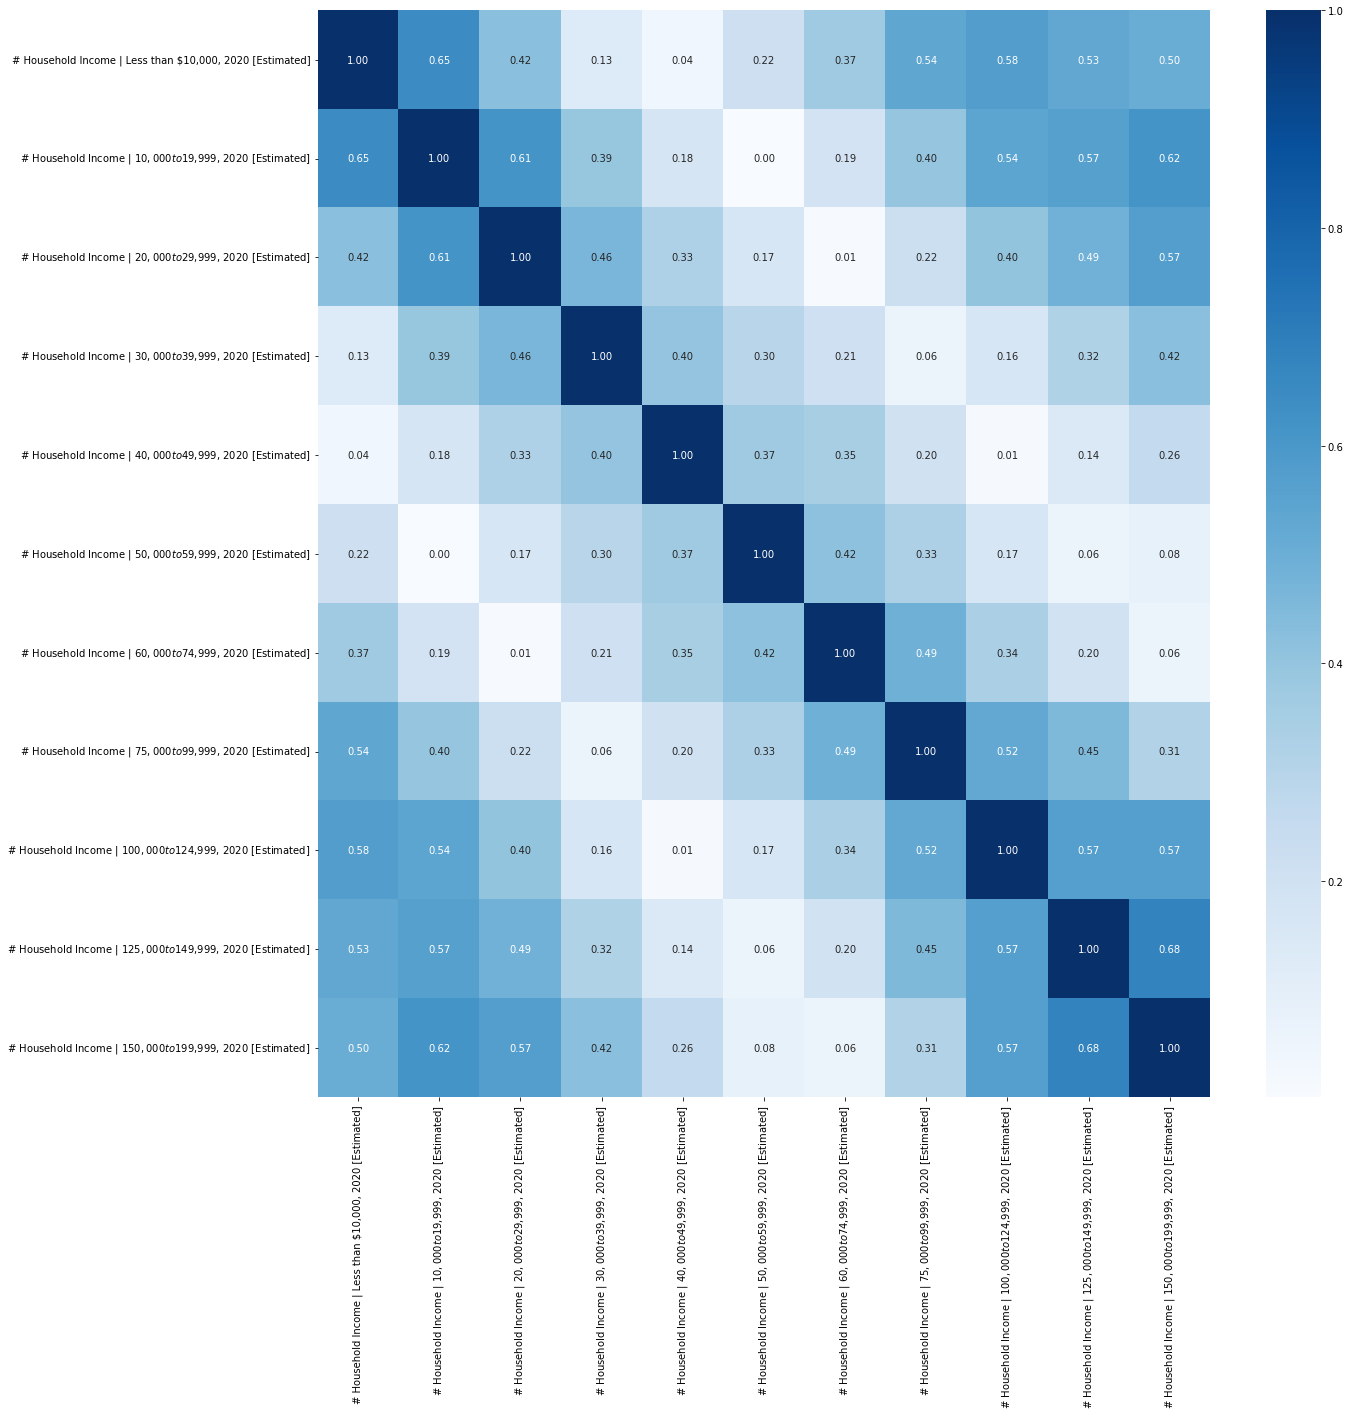

In [20]:
# plot heatmap
demo_plot = demo_clean.loc[:,demo_clean.columns.str.contains('# Household')].div(demo_clean.iloc[:,1],axis=0)
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(demo_plot.corr()),annot=True, fmt=".2f",cmap='Blues');

## Merge 2nd set of Simply Analytics Data ##

In [21]:
demo2 = pd.read_csv('pop_density_household_size_bachelor_attainment.csv')
demo2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 12 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Name                                                                      3220 non-null   object 
 1   FIPS                                                                      3220 non-null   int64  
 2   % Educational Attainment | Bachelor's degree or higher, 2021 [Estimated]  3220 non-null   float64
 3   Population Density (per square mile), 2021 [Estimated]                    3220 non-null   float64
 4   % Household Size | 1-person household, 2021 [Estimated]                   3220 non-null   float64
 5   % Household Size | 2-person household, 2021 [Estimated]                   3220 non-null   float64
 6   % Household Size | 3-person household, 2021 [Estimated]         

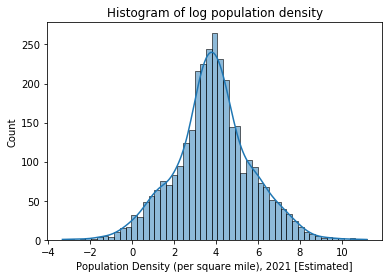

In [22]:
sns.histplot(np.log(demo2.iloc[:,3]),kde=True)
plt.title('Histogram of log population density');

In [27]:
demo2.iloc[:,3] = np.log(demo2.iloc[:,3])
demo2 = demo2.rename(columns={'Population Density (per square mile), 2021 [Estimated]':'Log Population Density (per sqmi)'})
demo2.iloc[:,[2,4,5,6,7,8,9,11]] = demo2.iloc[:,[2,4,5,6,7,8,9,11]]/100
demo_merged = demo_1.merge(demo2.iloc[:,0:],left_index=True,right_index=True,how='inner')
demo_merged.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 0 to 3219
Data columns (total 163 columns):
 #    Column                                                                                                                                                   Dtype  
---   ------                                                                                                                                                   -----  
 0    # Total Population, 2020 [Estimated]                                                                                                                     float64
 1    # Age | 5 to 9 years, 2020 [Estimated]                                                                                                                   float64
 2    # Age | 10 to 14 years, 2020 [Estimated]                                                                                                                 float64
 3    # Age | 15 to 17 years, 2020 [Estimated]           

In [28]:
demo_merged.to_csv('model_data_V1.csv',index=False)

## Test-train split and model creation ##

In [68]:
x = demo_merged.drop('Name',axis=1)

labels = [col for col in demo.columns if "covid" in col.lower()]
y = demo[labels]
# y_lab = y[labels[11]]/y[labels[23]] # mortality
# y_lab = y[labels[11]]
y_lab = y[labels[11]].div(demo_clean.iloc[:,1]) # death percentage
# y_lab = y[labels[23]].div(demo_clean.iloc[:,1]) # case percentage

y_lab = y_lab.loc[x.index]


sum(y_lab.isna())
x = x.loc[~y_lab.isna(),:]
y_lab = y_lab.loc[~y_lab.isna()]

In [69]:
# clean up missing values
for l in labels:
    if l in x.columns:
        x = x.drop(l, axis=1)
bad_col = [c for c in x.columns if x[c].isna().sum() > 10]
x = x.drop(bad_col, axis=1)

for c in x.columns:
    x[c].fillna(value=x[c].mean(), inplace=True)

print(np.isinf(y_lab).sum())
print(y_lab.isna().sum())

X_train, X_test, y_train, y_test = train_test_split(x, y_lab, test_size=0.15, random_state=42)

0
0


In [70]:
x.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 0 to 3219
Data columns (total 119 columns):
 #   Column                                                                            Dtype  
---  ------                                                                            -----  
 0   # Total Population, 2020 [Estimated]                                              float64
 1   # Age | 5 to 9 years, 2020 [Estimated]                                            float64
 2   # Age | 10 to 14 years, 2020 [Estimated]                                          float64
 3   # Age | 15 to 17 years, 2020 [Estimated]                                          float64
 4   # Age | 18 and 19 years, 2020 [Estimated]                                         float64
 5   # Age | 20 to 24 years, 2020 [Estimated]                                          float64
 6   # Age | 25 to 34 years, 2020 [Estimated]                                          float64
 7   # Age | 35 to 44 years, 2020 [Es

In [24]:
X_test

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,"% Educational Attainment | Bachelor's degree or higher, 2021 [Estimated]","Population Density (per square mile), 2021 [Estimated]","% Household Size | 1-person household, 2021 [Estimated]","% Household Size | 2-person household, 2021 [Estimated]","% Household Size | 3-person household, 2021 [Estimated]","% Household Size | 4-person household, 2021 [Estimated]","% Household Size | 5-person household, 2021 [Estimated]","% Household Size | 6-person household, 2021 [Estimated]","# Gini Index Of Income Inequality [B19083] | Gini Index, 2019","% Hispanic or Latino | Hispanic or Latino, 2021 [Estimated]"
1844,19042.0,0.068533,0.074204,0.043378,0.024892,0.062283,0.100672,0.123411,0.131079,0.134020,...,0.126007,55.1572,0.364631,0.318292,0.086058,0.151310,0.043367,0.019049,0.4515,0.031764
823,7650.0,0.064314,0.040523,0.031895,0.085621,0.075686,0.094641,0.103922,0.109020,0.139346,...,0.223905,19.3403,0.324623,0.376214,0.089112,0.092797,0.083752,0.017085,0.4324,0.033903
469,9392.0,0.077300,0.089757,0.044399,0.030771,0.062500,0.100298,0.094336,0.096678,0.125958,...,0.180759,8.5832,0.311047,0.339382,0.121617,0.124164,0.037568,0.030882,0.4368,0.041401
2634,8208.0,0.062865,0.052022,0.033626,0.029971,0.042519,0.108796,0.120492,0.101974,0.149366,...,0.163290,34.0664,0.331263,0.401065,0.086957,0.122449,0.023366,0.015380,0.6006,0.033119
2414,21766.0,0.069834,0.053937,0.035468,0.023936,0.053616,0.115869,0.089360,0.118855,0.148443,...,0.252799,63.5340,0.271297,0.410412,0.158486,0.089478,0.040612,0.019481,0.4855,0.076488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,48188.0,0.045966,0.042293,0.031979,0.019113,0.046505,0.089213,0.093114,0.127874,0.182390,...,0.348211,51.8918,0.280257,0.459447,0.103074,0.088755,0.049251,0.008488,0.4446,0.020473
1786,54690.0,0.063540,0.052770,0.040080,0.019729,0.046151,0.125434,0.111519,0.120717,0.147102,...,0.130615,27.6629,0.278415,0.382666,0.094381,0.111687,0.073494,0.041957,0.4011,0.180040
2575,284008.0,0.049073,0.051266,0.029971,0.050048,0.107610,0.114222,0.106444,0.105155,0.134891,...,0.352364,86.4735,0.255982,0.396060,0.141683,0.115050,0.055144,0.020886,0.4496,0.231627
1818,22105.0,0.068356,0.062384,0.037593,0.028636,0.060077,0.115539,0.112870,0.113866,0.137752,...,0.218024,38.6208,0.262479,0.365734,0.151799,0.108167,0.077327,0.015648,0.4444,0.025718


In [25]:
for c in X_train.columns:
    if X_train[c].isna().sum()> 1:
        print(c)
print(X_train.isna().sum().sum())

0


In [26]:
lm = LinearRegression().fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_pred = lm.predict(X_test)

# The coefficients
print("Coefficients: \n", lm.coef_)
# The mean squared error
print("Mean squared error: %.10f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("(Train) Coefficient of determination: %.2f" % r2_score(y_train, y_train_pred))
print("(Test) Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 3.21967935e-11 -7.86961929e-03 -5.04765627e-03  8.07377271e-06
 -4.54487675e-03 -4.23895030e-03 -7.36825182e-03 -5.69398714e-03
 -6.33656451e-03 -9.07962651e-03 -1.05968789e-02 -1.37817333e-03
  1.44677616e-02 -1.52729572e-03  6.86168160e-04  5.17352322e-06
  9.81507480e-04  8.68882475e-05  3.95355729e-03  4.96457734e-03
 -8.36967307e-04  1.40891962e-03 -1.08346673e-03  2.05296628e-03
  9.94466101e-04 -1.04620658e-03 -6.76627585e-04 -2.83105190e-03
 -2.13330164e-03 -1.27624443e-01  1.37173958e-01  1.38871504e-01
  1.34713951e-01  1.35070528e-01  1.34938517e-01  1.34118927e-01
  1.29937403e-01  9.01152025e-03 -2.39921966e-02 -1.79285254e-02
  4.02835317e-02  4.03726426e-02  1.81090974e-02 -2.07936671e-03
  2.96145795e-03  1.51077311e-03  4.21748415e-03 -2.18969957e-03
  7.13365895e-03  9.82852398e-03 -2.61239308e-04 -3.41869886e-03
 -2.96446300e-03 -1.31474713e-03 -2.09778534e-03  4.91739785e-03
  8.60274782e-03  5.67075761e-04  7.47602161e-04  9.12509178e-04
  2.20993

In [27]:
for i in np.arange(len(x.columns)):
    print((x.columns[i],round(lm.coef_[i],4)))

('# Total Population, 2020 [Estimated]', 0.0)
('# Age | 5 to 9 years, 2020 [Estimated]', -0.0079)
('# Age | 10 to 14 years, 2020 [Estimated]', -0.005)
('# Age | 15 to 17 years, 2020 [Estimated]', 0.0)
('# Age | 18 and 19 years, 2020 [Estimated]', -0.0045)
('# Age | 20 to 24 years, 2020 [Estimated]', -0.0042)
('# Age | 25 to 34 years, 2020 [Estimated]', -0.0074)
('# Age | 35 to 44 years, 2020 [Estimated]', -0.0057)
('# Age | 45 to 54 years, 2020 [Estimated]', -0.0063)
('# Age | 55 to 64 years, 2020 [Estimated]', -0.0091)
('# Age | 65 to 74 years, 2020 [Estimated]', -0.0106)
('# Age | 75 to 84 years, 2020 [Estimated]', -0.0014)
('# Age | 85 years and over, 2020 [Estimated]', 0.0145)
('# Sex | Female, 2020 [Estimated]', -0.0015)
('# Race | Black or African American alone, 2020 [Estimated]', 0.0007)
('# Race | White alone, 2020 [Estimated]', 0.0)
('# Race | American Indian and Alaska Native alone, 2020 [Estimated]', 0.001)
('# Race | Asian alone, 2020 [Estimated]', 0.0001)
('# Household In

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.00073935159307277

In [29]:
y_train.median()

0.0009592208175512814

In [30]:
rf = RandomForestRegressor(max_depth = 30,n_estimators=300)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
# The coefficients
# print("Coefficients: \n", lm.coef_)
# The mean squared error
print("Mean squared error: %.10f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("(Train) Coefficient of determination: %.2f" % r2_score(y_train, y_train_pred))
print("(Test) Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.0000005897
(Train) Coefficient of determination: 0.84
(Test) Coefficient of determination: 0.21


In [31]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.000767940527184319